# Intro

The 2020-21 season of the [English Premier League](https://www.premierleague.com/) was marked by the almost total absence of spectators due to the pandemic. Did empty stadiums affect the home team advantage?




# Import libraries and load dataset


In [51]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [52]:
# Load data downloaded from https://www.kaggle.com/irkaal/english-premier-league-results and show first rows

EPL_data = pd.read_csv('./epl-data.csv', encoding = 'unicode_escape')
EPL_data.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## First impressions

In [53]:
# Data dimensionality

EPL_data.shape

(10804, 23)

In [54]:
# Dataframe info

EPL_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10804 entries, 0 to 10803
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10804 non-null  object 
 1   DateTime  10804 non-null  object 
 2   HomeTeam  10804 non-null  object 
 3   AwayTeam  10804 non-null  object 
 4   FTHG      10804 non-null  int64  
 5   FTAG      10804 non-null  int64  
 6   FTR       10804 non-null  object 
 7   HTHG      9880 non-null   float64
 8   HTAG      9880 non-null   float64
 9   HTR       9880 non-null   object 
 10  Referee   7980 non-null   object 
 11  HS        7980 non-null   float64
 12  AS        7980 non-null   float64
 13  HST       7980 non-null   float64
 14  AST       7980 non-null   float64
 15  HC        7980 non-null   float64
 16  AC        7980 non-null   float64
 17  HF        7980 non-null   float64
 18  AF        7980 non-null   float64
 19  HY        7980 non-null   float64
 20  AY        7980 non-null   fl

In [55]:
# Rows that contain at least one NaN value 

EPL_data[EPL_data.isna().any(axis=1)]

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,1999-00,2000-05-14T00:00:00Z,Sheffield Weds,Leicester,4,0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2820,1999-00,2000-05-14T00:00:00Z,Southampton,Wimbledon,2,0,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2821,1999-00,2000-05-14T00:00:00Z,Tottenham,Sunderland,3,1,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2822,1999-00,2000-05-14T00:00:00Z,Watford,Coventry,1,0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Number of cells with NaN values per column

pd.isna(EPL_data).sum()

Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC          2824
AC          2824
HF          2824
AF          2824
HY          2824
AY          2824
HR          2824
AR          2824
dtype: int64

**HTHG** (Half-time home goals), **HTAG** (Half-time away goals), **HTR** (Half-time results), **Referee**, **HS** (Home team shots), **AS** (Away team shots), **HST** (Home team shots on target), **AST** (Away team shots on target), **HC** (Home team corners), **AC** (Away team corners), **HF** (Home team fouls), **AF** (Away team fouls), **HY** (Home team yellow cards), **AY** (Away team yellow cards), **HR** (Home team red cards) and **AR** (Away team red cards) stats are not available for all matches.

In [57]:
# Check which seasons are affected by NaN values 

columns_to_show = ['HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'HY', 'AY', 'HR', 'AR']

EPL_data.groupby(['Season'])[columns_to_show].apply(lambda x: x.isna().sum())

,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,
1993-94,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462
1994-95,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462
1995-96,0,0,0,380,380,380,380,380,380,380,380,380,380,380,380
1996-97,0,0,0,380,380,380,380,380,380,380,380,380,380,380,380
1997-98,0,0,0,380,380,380,380,380,380,380,380,380,380,380,380
1998-99,0,0,0,380,380,380,380,380,380,380,380,380,380,380,380
1999-00,0,0,0,380,380,380,380,380,380,380,380,380,380,380,380
2000-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2001-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


For seasons **1993-94** to **1999-00**, only **FTHG** (Full-time home goals), **FTAG** (full-time away goals) and **FTR** (full-time results) figures were available.


As shots are important for the home team advantage analysis and not available for seasons **1993-94** to **1999-00**, data from these seasons will be removed.

# Data cleaning

In [58]:
# Remove rows with at least one NaN value

EPL_data = EPL_data.dropna(how='any')
EPL_data.groupby(['Season'])[columns_to_show].apply(lambda x: x.isna().sum())

,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,
2000-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2001-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2002-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2003-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2006-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Exploratory data analysis


## Quick facts

In [59]:
EPL_data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,7980.000000,7980.000000,7980.000000,7980.00000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000
mean,1.520551,1.149749,0.681704,0.50401,13.492481,10.604762,6.173935,4.792732,6.102005,4.780201,11.426065,11.934586,1.404762,1.745489,0.063409,0.090476
std,1.297738,1.138600,0.831569,0.71970,5.245264,4.549672,3.338950,2.795785,3.099814,2.727745,3.787126,3.954527,1.184170,1.268853,0.254774,0.299282
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.00000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.00000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.00000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.00000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


Considering seasons **2000-01 to 2020-21**, it is possible to derive the following insights from the describe() method output:

*   On average, home teams scored more goals than away teams in the first halves and entire matches 
*   On average, home teams have more shots and shots on target than away teams in the first halves and entire matches

In [60]:
# Home wins (H), away wins (A) and draws (D)

EPL_data['FTR'].value_counts()

H    3673
A    2310
D    1997
Name: FTR, dtype: int64

Most wins were home ones.

In [61]:
# Home wins (H), away wins (A) and draws (D) for the 2020-21 season

EPL_2020_21 = EPL_data[EPL_data['Season'] == '2020-21']

EPL_2020_21['FTR'].value_counts()

A    153
H    144
D     83
Name: FTR, dtype: int64

The number of home wins was smaller than the number of away wins in the **2020-21** season.

## Home team advantage

### Home and away wins 

In [62]:
# Home wins per season

EPL_home_wins_season_series = EPL_data.loc[EPL_data['FTR']=='H'].groupby('Season')['FTR'].count()
EPL_home_wins_season = pd.DataFrame(EPL_home_wins_season_series).reset_index()
EPL_home_wins_season.columns = ['Season', 'Home wins']

In [63]:
# Away wins per season

EPL_away_wins_season_series = EPL_data.loc[EPL_data['FTR']=='A'].groupby('Season')['FTR'].count()
EPL_away_wins_season = pd.DataFrame(EPL_away_wins_season_series).reset_index()
EPL_away_wins_season.columns = ['Season', 'Away wins']

In [64]:
EPL_home_away_wins = pd.merge(EPL_home_wins_season, EPL_away_wins_season, on=['Season'])

<AxesSubplot:title={'center':'Home and away wins (2000-01 -- 2020-21)'}, xlabel='Season', ylabel='wins'>

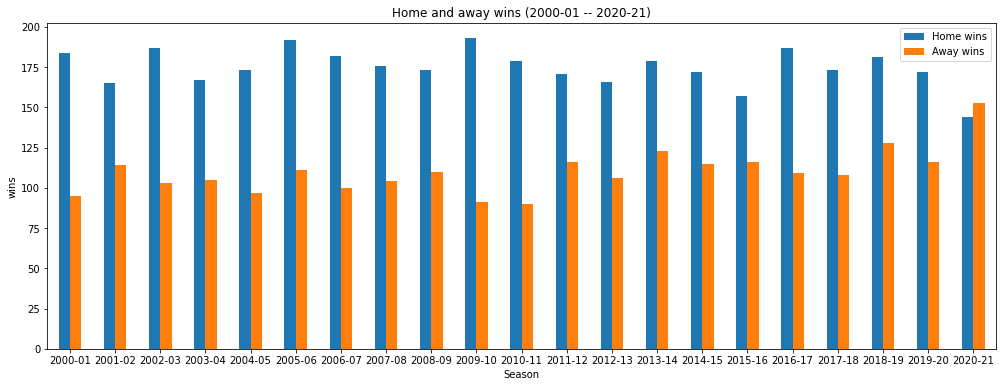

In [65]:
EPL_home_away_wins.plot.bar(
    x="Season",
    y=["Home wins", "Away wins"],
    rot=0,
    figsize=(17, 6),
    ylabel="wins",
    title="Home and away wins (2000-01 -- 2020-21)",
)

The difference between home and away wins was the smallest one in the **2020-21** season.

Away teams won more matches than home sides only in the **2020-21** season. It might reflect the almost total absence of spectators due to the pandemic.


In [66]:
# Percentage of home team wins

EPL_home_wins_pct_series = 100*(EPL_data.loc[EPL_data['FTR']=='H'].groupby('HomeTeam')['FTR'].count()/EPL_data.groupby('HomeTeam')['FTR'].count())
EPL_home_wins_pct = pd.DataFrame(EPL_home_wins_pct_series).reset_index()
EPL_home_wins_pct.columns = ['Team', 'Home team wins (%)']

In [67]:
# Percentage of away team wins

EPL_away_wins_pct_series = 100*(EPL_data.loc[EPL_data['FTR']=='A'].groupby('AwayTeam')['FTR'].count()/EPL_data.groupby('AwayTeam')['FTR'].count())
EPL_away_wins_pct = pd.DataFrame(EPL_away_wins_pct_series).reset_index()
EPL_away_wins_pct.columns = ['Team', 'Away team wins (%)']

In [68]:
EPL_home_away_wins_pct = pd.merge(EPL_home_wins_pct, EPL_away_wins_pct, on=['Team'])

In [69]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=EPL_home_away_wins_pct['Away team wins (%)'],
    y=EPL_home_away_wins_pct['Team'],
    name='Away wins (%)',
    marker=dict(
        color='rgba(253, 127, 40, 1)',
        line_color='rgba(253, 127, 40, 1)',
    )
))
fig.add_trace(go.Scatter(
    x=EPL_home_away_wins_pct['Home team wins (%)'], 
    y=EPL_home_away_wins_pct['Team'],
    name='Home wins (%)',
    marker=dict(
        color='rgba(38, 120, 178, 1)',
        line_color='rgba(38, 120, 178, 1)'
    )
))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=10))

fig.update_layout(
    title="Home and away wins (2000-01 -- 2020-21)",
    xaxis_title="Wins (%)",
    yaxis_title="Team",
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=1200,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

The percentages of home wins are higher than the away win percentages for all teams with the exception of Coventry, whose percentages are equal.


In [70]:
# 2020-21 home wins

EPL_2020_21 = EPL_data[EPL_data['Season'] == '2020-21']
EPL_2020_21_home_wins_pct_series = 100*(EPL_2020_21.loc[EPL_2020_21['FTR']=='H'].groupby('HomeTeam')['FTR'].count()/EPL_2020_21.groupby('HomeTeam')['FTR'].count())
EPL_2020_21_home_wins_pct = pd.DataFrame(EPL_2020_21_home_wins_pct_series).reset_index()
EPL_2020_21_home_wins_pct.columns = ['Team', 'Home team wins (%)']

In [71]:
# 2020-21 away wins

EPL_2020_21_away_wins_pct_series = 100*(EPL_2020_21.loc[EPL_2020_21['FTR']=='A'].groupby('AwayTeam')['FTR'].count()/EPL_2020_21.groupby('AwayTeam')['FTR'].count())
EPL_2020_21_away_wins_pct = pd.DataFrame(EPL_2020_21_away_wins_pct_series).reset_index()
EPL_2020_21_away_wins_pct.columns = ['Team', 'Away team wins (%)']

In [72]:
EPL_2020_21_home_away_wins_pct = pd.merge(EPL_2020_21_home_wins_pct, EPL_2020_21_away_wins_pct, on=['Team'])

In [73]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=EPL_2020_21_home_away_wins_pct['Away team wins (%)'],
    y=EPL_2020_21_home_away_wins_pct['Team'],
    name='Away wins',
    marker=dict(
        color='rgba(253, 127, 40, 1)',
        line_color='rgba(253, 127, 40, 1)',
    )
))
fig.add_trace(go.Scatter(
    x=EPL_2020_21_home_away_wins_pct['Home team wins (%)'], 
    y=EPL_2020_21_home_away_wins_pct['Team'],
    name='Home wins',
    marker=dict(
        color='rgba(38, 120, 178, 1)',
        line_color='rgba(38, 120, 178, 1)'
    )
))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=10))

fig.update_layout(
    title="2020-21 Home and away wins (%)",
    xaxis_title="Wins",
    yaxis_title="Team",
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=800,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

Eleven teams (Arsenal, Aston Villa, Arsenal, Brighton, Burnley, Chelsea, Everton, Fulham, Leeds, Leicester, Manchester City and Manchester United) won more away matches than home ones in the **2020-21** season. 

### Goals

In [74]:
# Home goals by season 

EPL_home_goals_season_series = EPL_data.groupby('Season')['FTHG'].sum()
EPL_home_goals_season = pd.DataFrame(EPL_home_goals_season_series).reset_index()
EPL_home_goals_season.columns = ['Season', 'Home goals']

In [75]:
# Away goals by season 

EPL_away_goals_season_series = EPL_data.groupby('Season')['FTAG'].sum()
EPL_away_goals_season = pd.DataFrame(EPL_away_goals_season_series).reset_index()
EPL_away_goals_season.columns = ['Season', 'Away goals']

In [76]:
EPL_home_away_goals = pd.merge(EPL_home_goals_season, EPL_away_goals_season, on=['Season'])

<AxesSubplot:title={'center':'Home and away goals (2000-01 -- 2020-21)'}, xlabel='Season', ylabel='Goals scored'>

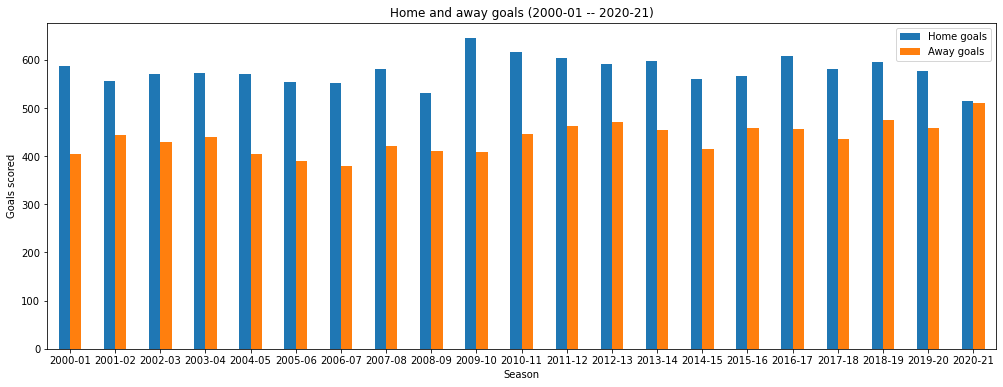

In [77]:
EPL_home_away_goals.plot.bar(
    x="Season",
    y=["Home goals", "Away goals"],
    rot=0,
    figsize=(17, 6),
    ylabel="Goals scored",
    title="Home and away goals (2000-01 -- 2020-21)",
)

The **2020-21** season was the worst concerning home goals and the best concerning away goals. Did home teams score fewer goals due to the lack of supporters in stadiums?

In [78]:
# Create home and away dataframes

EPL_data_home = EPL_data.groupby('HomeTeam')
EPL_data_away = EPL_data.groupby('AwayTeam')

In [79]:
# Percentage of home goals by team

EPL_home_goals_pct_series = 100*(EPL_data_home['FTHG'].sum()/(EPL_data_home['FTHG'].sum() + EPL_data_away['FTAG'].sum()))
EPL_home_goals_pct = pd.DataFrame(EPL_home_goals_pct_series).reset_index()
EPL_home_goals_pct.columns = ['Team', 'Home goals (%)']

In [80]:
# Percentage of away goals by team

EPL_away_goals_pct_series = 100*(EPL_data_away['FTAG'].sum()/(EPL_data_home['FTHG'].sum() + EPL_data_away['FTAG'].sum()))
EPL_away_goals_pct = pd.DataFrame(EPL_away_goals_pct_series).reset_index()
EPL_away_goals_pct.columns = ['Team', 'Away goals (%)']

In [81]:
EPL_home_away_goals_pct = pd.merge(EPL_home_goals_pct, EPL_away_goals_pct, on=['Team'])

In [82]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=EPL_home_away_goals_pct['Away goals (%)'],
    y=EPL_home_away_goals_pct['Team'],
    name='Away goals (%)',
    marker=dict(
        color='rgba(253, 127, 40, 1)',
        line_color='rgba(253, 127, 40, 1)',
    )
))
fig.add_trace(go.Scatter(
    x=EPL_home_away_goals_pct['Home goals (%)'], 
    y=EPL_home_away_goals_pct['Team'],
    name='Home goals (%)',
    marker=dict(
        color='rgba(38, 120, 178, 1)',
        line_color='rgba(38, 120, 178, 1)'
    )
))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=10))

fig.update_layout(
    title="Home and away goals (2000-01 -- 2020-21)",
    xaxis_title="Goals (%)",
    yaxis_title="Team",
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=1200,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

With the exception of Coventry and Crystal Palace, all teams scored at least 50% of their goals at home. Moreover, only Coventry and Crystal Palace score more away goals than home ones.

In [83]:
# Create 2020-21 home and away dataframes

EPL_2020_21_home = EPL_2020_21.groupby('HomeTeam')
EPL_2020_21_away = EPL_2020_21.groupby('AwayTeam')

In [84]:
# Percentage of home goals by team (2020-21)

EPL_2020_21_home_goals_pct_series = 100*(EPL_2020_21_home['FTHG'].sum()/(EPL_2020_21_home['FTHG'].sum() + EPL_2020_21_away['FTAG'].sum()))
EPL_2020_21_home_goals_pct = pd.DataFrame(EPL_2020_21_home_goals_pct_series).reset_index()
EPL_2020_21_home_goals_pct.columns = ['Team', 'Home goals (%)']

In [85]:
# Percentage of away goals by team (2020-21)

EPL_2020_21_away_goals_pct_series = 100*(EPL_2020_21_away['FTAG'].sum()/(EPL_2020_21_home['FTHG'].sum() + EPL_2020_21_away['FTAG'].sum()))
EPL_2020_21_away_goals_pct = pd.DataFrame(EPL_2020_21_away_goals_pct_series).reset_index()
EPL_2020_21_away_goals_pct.columns = ['Team', 'Away goals (%)']

In [86]:
EPL_2020_21_home_away_goals_pct = pd.merge(EPL_2020_21_home_goals_pct, EPL_2020_21_away_goals_pct, on=['Team'])

In [87]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=EPL_2020_21_home_away_goals_pct['Away goals (%)'],
    y=EPL_2020_21_home_away_goals_pct['Team'],
    name='Away goals (%)',
    marker=dict(
        color='rgba(253, 127, 40, 1)',
        line_color='rgba(253, 127, 40, 1)',
    )
))
fig.add_trace(go.Scatter(
    x=EPL_2020_21_home_away_goals_pct['Home goals (%)'], 
    y=EPL_2020_21_home_away_goals_pct['Team'],
    name='Home goals (%)',
    marker=dict(
        color='rgba(38, 120, 178, 1)',
        line_color='rgba(38, 120, 178, 1)'
    )
))
fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=10))

fig.update_layout(
    title="2021 Home and away goals",
    xaxis_title="Goals (%)",
    yaxis_title="Team",
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=800,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

    


Arsenal, Burnley, Crystal Palace, Fulham, Leeds, Leicester, Liverpool and West Brom scored at least 50% of their goals on the road in the **2020-21** season. Fulham scored over 66% of their goals in away matches.

Could these teams' performances in away games have been influenced by empty stadiums? 

### Shots

In [88]:
# Home team shots by season 

EPL_home_shots_season_series = EPL_data.groupby('Season')['HS'].sum()
EPL_home_shots_season = pd.DataFrame(EPL_home_shots_season_series).reset_index()
EPL_home_shots_season.columns = ['Season', 'Home shots']

In [89]:
# Away team shots by season 

EPL_away_shots_season_series = EPL_data.groupby('Season')['AS'].sum()
EPL_away_shots_season = pd.DataFrame(EPL_away_shots_season_series).reset_index()
EPL_away_shots_season.columns = ['Season', 'Away shots']

In [90]:
EPL_home_away_shots = pd.merge(EPL_home_shots_season, EPL_away_shots_season, on=['Season'])

<AxesSubplot:title={'center':'Home and away team shots (2000-01 -- 2020-21)'}, xlabel='Season', ylabel='Shots'>

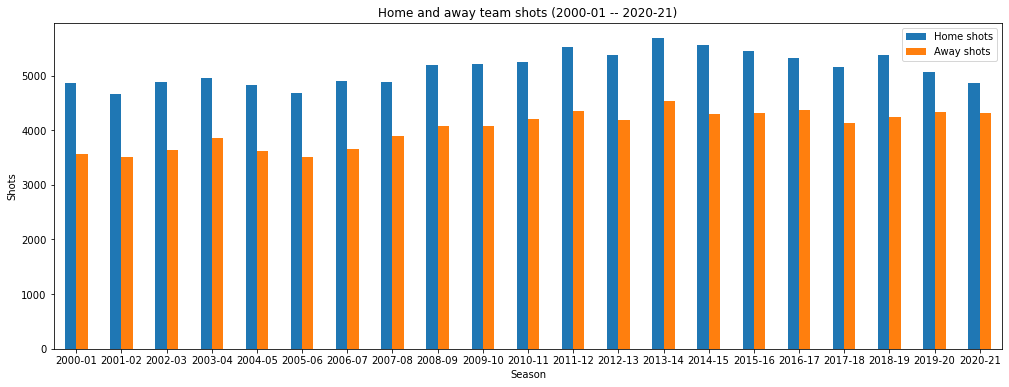

In [91]:
EPL_home_away_shots.plot.bar(
    x="Season",
    y=["Home shots", "Away shots"],
    rot=0,
    figsize=(17, 6),
    ylabel="Shots",
    title="Home and away team shots (2000-01 -- 2020-21)",
)

The number of home shots in the **2020-21** season is among the five worst in the 2000-01 -- 2020-21 period.



In [92]:
# Percentage of home shots by team

EPL_home_shots_pct_series = 100*(EPL_data_home['HS'].sum()/(EPL_data_home['HS'].sum() + EPL_data_away['AS'].sum()))
EPL_home_shots_pct = pd.DataFrame(EPL_home_shots_pct_series).reset_index()
EPL_home_shots_pct.columns = ['Team', 'Home shots (%)']

In [93]:
# Percentage of away shots by team

EPL_away_shots_pct_series = 100*(EPL_data_away['AS'].sum()/(EPL_data_home['HS'].sum() + EPL_data_away['AS'].sum()))
EPL_away_shots_pct = pd.DataFrame(EPL_away_shots_pct_series).reset_index()
EPL_away_shots_pct.columns = ['Team', 'Away shots (%)']

In [94]:
EPL_home_away_shots_pct = pd.merge(EPL_home_shots_pct, EPL_away_shots_pct, on=['Team'])

In [95]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=EPL_home_away_shots_pct['Away shots (%)'],
    y=EPL_home_away_shots_pct['Team'],
    name='Away shots (%)',
    marker=dict(
        color='rgba(253, 127, 40, 1)',
        line_color='rgba(253, 127, 40, 1)',
    )
))
fig.add_trace(go.Scatter(
    x=EPL_home_away_shots_pct['Home shots (%)'], 
    y=EPL_home_away_shots_pct['Team'],
    name='Home shots (%)',
    marker=dict(
        color='rgba(38, 120, 178, 1)',
        line_color='rgba(38, 120, 178, 1)'
    )
))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=10))

fig.update_layout(
    title="Home and away shots (2000-01 -- 2020-21)",
    xaxis_title="Shots (%)",
    yaxis_title="Team",
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=1200,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

Considering seasons 2000-01 to 2020-21, at least 53% of a team's shots are home ones. For the aforementioned period, Reading was the team with the highest percentage of away shots (approx. 46.9%).

In [96]:
# Percentage of home shots by team (2020-21)

EPL_2020_21_home_shots_pct_series = 100*(EPL_2020_21_home['HS'].sum()/(EPL_2020_21_home['HS'].sum() + EPL_2020_21_away['AS'].sum()))
EPL_2020_21_home_shots_pct = pd.DataFrame(EPL_2020_21_home_shots_pct_series).reset_index()
EPL_2020_21_home_shots_pct.columns = ['Team', 'Home shots (%)']

In [97]:
# Percentage of away shots by team (2020-21)

EPL_2020_21_away_shots_pct_series = 100*(EPL_2020_21_away['AS'].sum()/(EPL_2020_21_home['HS'].sum() + EPL_2020_21_away['AS'].sum()))
EPL_2020_21_away_shots_pct = pd.DataFrame(EPL_2020_21_away_shots_pct_series).reset_index()
EPL_2020_21_away_shots_pct.columns = ['Team', 'Away shots (%)']

In [98]:
EPL_2020_21_home_away_shots_pct = pd.merge(EPL_2020_21_home_shots_pct, EPL_2020_21_away_shots_pct, on=['Team'])

In [99]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=EPL_2020_21_home_away_shots_pct['Away shots (%)'],
    y=EPL_2020_21_home_away_shots_pct['Team'],
    name='Away shots (%)',
    marker=dict(
        color='rgba(253, 127, 40, 1)',
        line_color='rgba(253, 127, 40, 1)',
    )
))
fig.add_trace(go.Scatter(
    x=EPL_2020_21_home_away_shots_pct['Home shots (%)'], 
    y=EPL_2020_21_home_away_goals_pct['Team'],
    name='Home shots (%)',
    marker=dict(
        color='rgba(38, 120, 178, 1)',
        line_color='rgba(38, 120, 178, 1)'
    )
))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=10))

fig.update_layout(
    title="2021 Home and away shots",
    xaxis_title="Shots (%)",
    yaxis_title="Team",
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=800,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)
fig.show()

For the **2020-21**, the percentage of away shots was higher than 46.9% for Arsenal, Aston Villa, Burnley, Chelsea, Fulham, Leeds, Leicester, Liverpool, Manchester United, Tottenham and West Brom.

The percentage of home shots was below 53% for Arsenal, Aston Villa, Burnley, Chelsea, Crystal Palace, Fulham, Leeds, Leicester, Liverpool, Manchester United, Tottenham, West Brom and West Ham.

## Conclusions


*   The difference between home and away wins was the smallest one in the 2020-21 season.
*   Eleven teams won more away matches than home ones in the 2020-21 season.
*   Home teams scored fewer goals in the 2020-21 season than in any other season between 2000-01 and 2020-21.
*   Away teams scored more goals in the 2020-21 season than in any other season between 2000-01 and 2020-21.
*   With the exception of Coventry and Crystal Palace, all teams scored at least 50% of their goals at home between 2000-01 and 2020-21. Arsenal, Burnley, Crystal Palace, Fulham, Leeds, Leicester, Liverpool and West Brom scored at least 50% of their goals on the road in the 2020-21 season, though.
*   Considering seasons 2000-01 -- 2020-21, at least 53% of a team's shots are home ones. Conversely, the percentage of home shots was below 53% for Arsenal, Aston Villa, Burnley, Chelsea, Crystal Palace, Fulham, Leeds, Leicester, Liverpool, Manchester United, Tottenham, West Brom and West Ham in the 2020-21 season.

Empty stadiums might have had a negative impact on the home team advantage in the 2020-21 season.









